In [ ]:
#pip install yfinance


In [1]:
import yfinance as yf


In [2]:
from datetime import datetime
end = datetime.now()

start = datetime(end.year-10,end.month,end.day)

In [3]:
stock = "TCS"
tcs_data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
tcs_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-09,27.500000,27.850000,27.350000,27.500000,25.706522,287800
2014-06-10,27.290001,27.440001,26.860001,27.370001,25.585001,352700
2014-06-11,27.150000,27.620001,27.150000,27.570000,25.771957,91600
2014-06-12,27.520000,28.379999,27.370001,27.990000,26.164566,306100
2014-06-13,27.990000,28.120001,27.299999,27.730000,25.921522,197800


In [5]:
tcs_data.shape

(2518, 6)

In [6]:
tcs_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,8.079929,8.289333,7.874889,8.074639,7.728042,4.413722e+05
std,5.672850,5.799296,5.551021,5.673081,5.356079,5.687903e+05
min,0.640000,0.690000,0.610000,0.630000,0.630000,3.000000e+04
25%,4.250000,4.360000,4.152500,4.242500,4.010217,1.899250e+05
50%,5.900000,6.055000,5.760000,5.900000,5.529239,2.913500e+05
75%,10.730000,10.970000,10.407500,10.717500,10.398098,4.776750e+05
max,30.200001,30.680000,29.510000,29.980000,28.024782,9.697500e+06


In [7]:
tcs_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2014-06-09 to 2024-06-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2518 non-null   float64
 1   High       2518 non-null   float64
 2   Low        2518 non-null   float64
 3   Close      2518 non-null   float64
 4   Adj Close  2518 non-null   float64
 5   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.7 KB


In [8]:
tcs_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'closing price of tcs data')

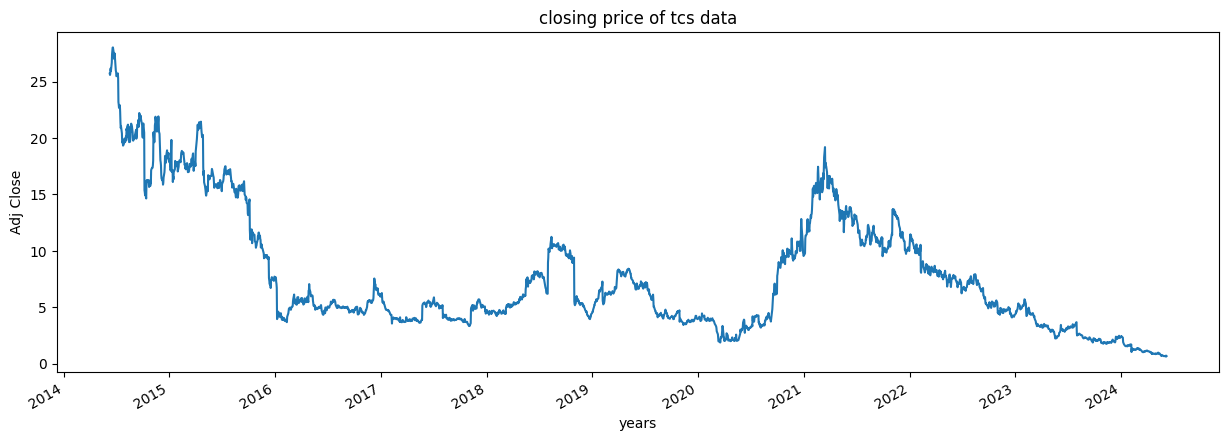

In [10]:
plt.figure(figsize = (15,5))
tcs_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("closing price of tcs data")

In [11]:
def plot_graph(figsize,values,column_name):
  plt.figure(figsize =figsize)
  values.plot()
  plt.xlabel("years")
  plt.ylabel("Adj Close")
  plt.title(f" {column_name} of tcs data")

In [12]:
tcs_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

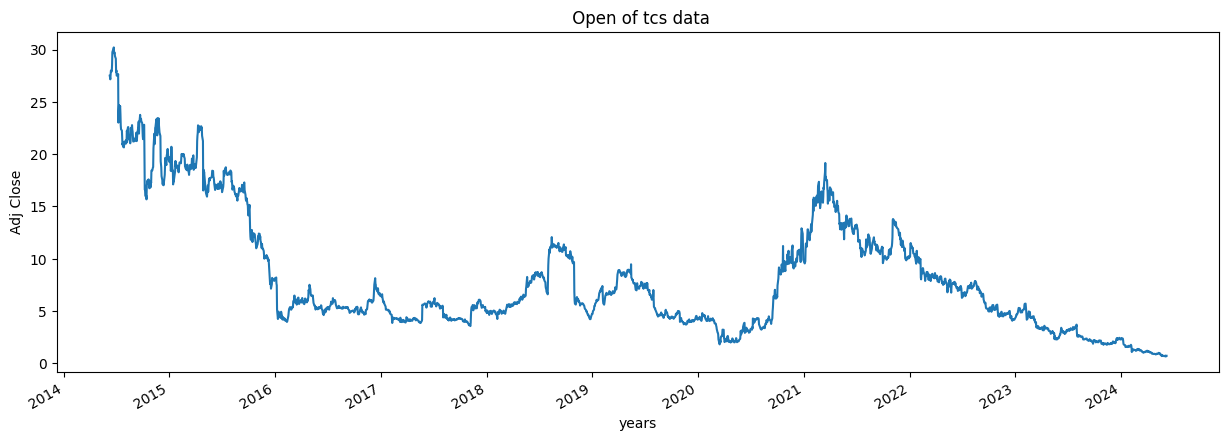

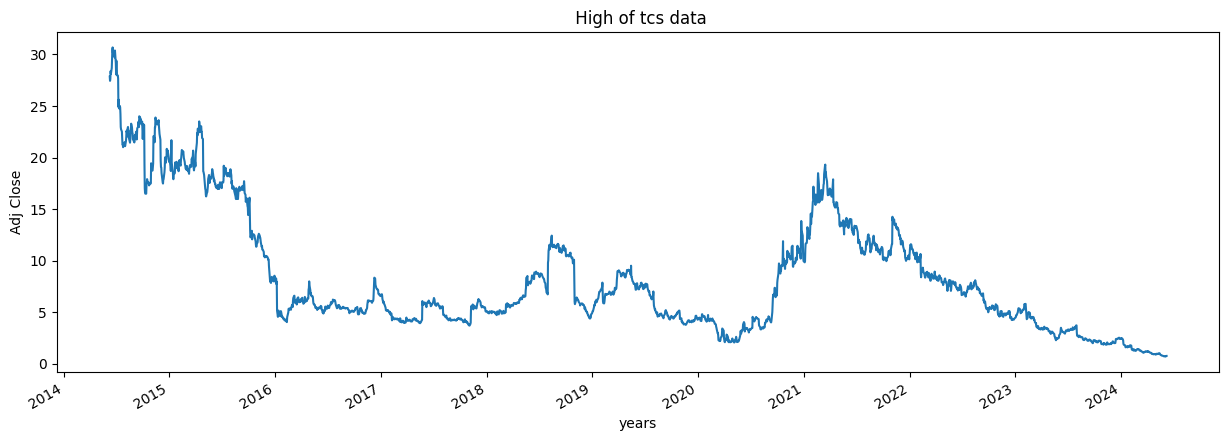

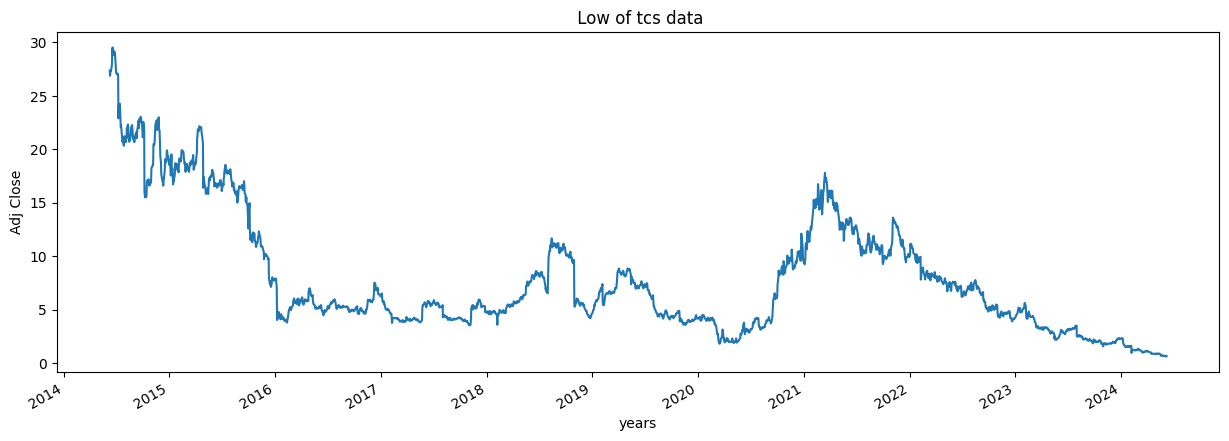

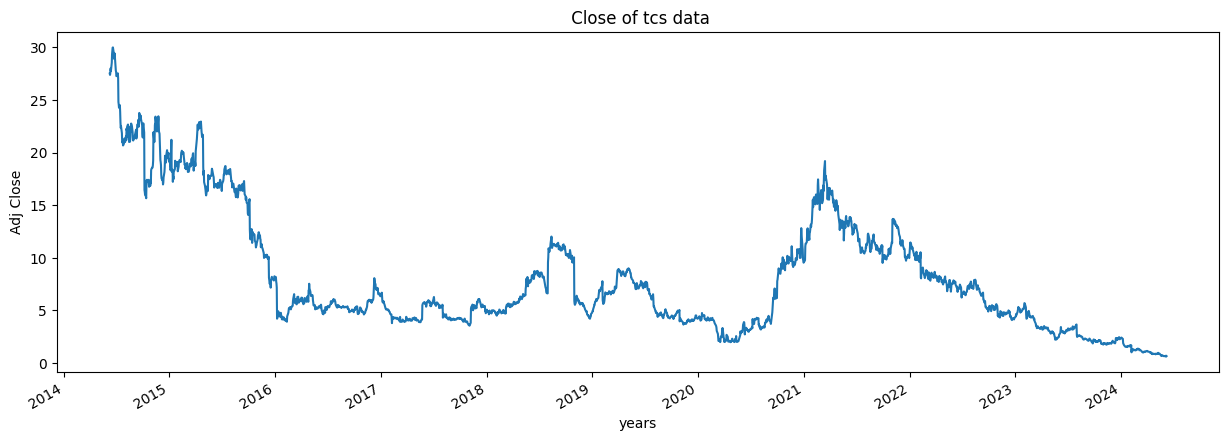

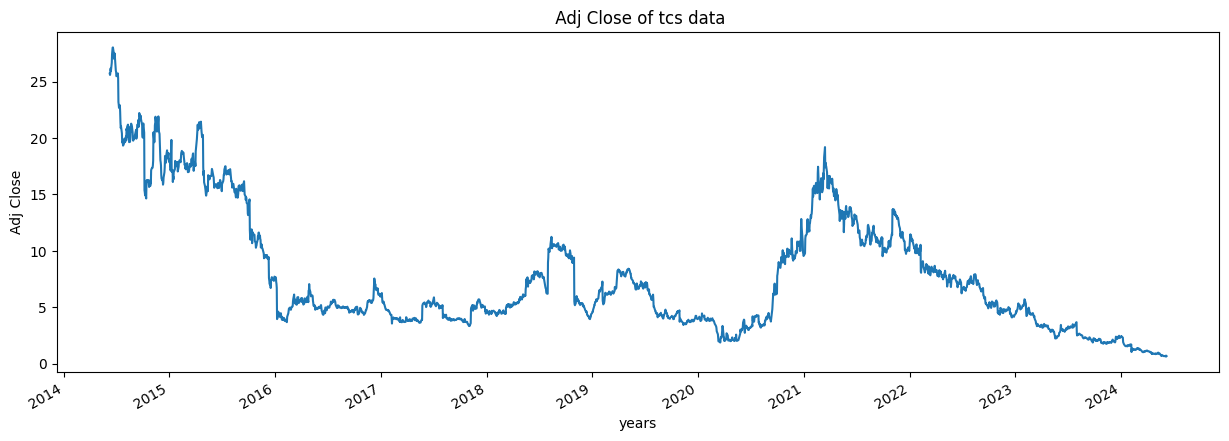

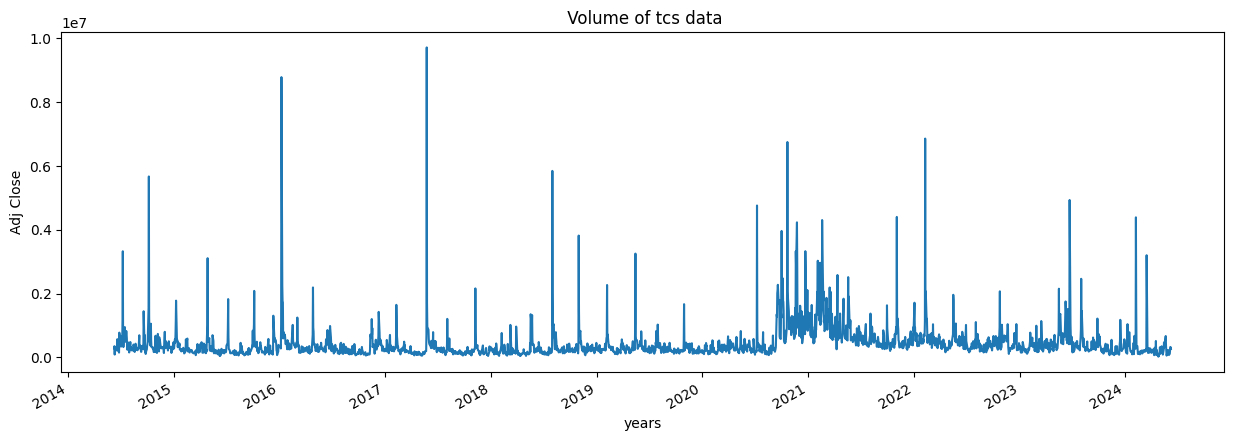

In [13]:
for column in tcs_data.columns:
  plot_graph((15,5),tcs_data[column],column)

In [16]:
temp_data = [10,20,30,40,50,60,70,80,90,100]
print(sum(temp_data[:5])/5)

30.0


In [17]:
import pandas as pd

In [18]:
data = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
print(data)

     0
0   10
1   20
2   30
3   40
4   50
5   60
6   70
7   80
8   90
9  100


In [19]:
data["MA"]=data.rolling(5).mean()
data


,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [20]:
for i in range(2014,2025):
  print(i,list(tcs_data.index.year).count(i))

2014 144
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 110


In [21]:
tcs_data["ma for 250"]=tcs_data['Adj Close'].rolling(250).mean()

In [22]:
tcs_data["ma for 250"][0:250].tail()

Date
2015-05-29          NaN
2015-06-01          NaN
2015-06-02          NaN
2015-06-03          NaN
2015-06-04    19.289314
Name: ma for 250, dtype: float64

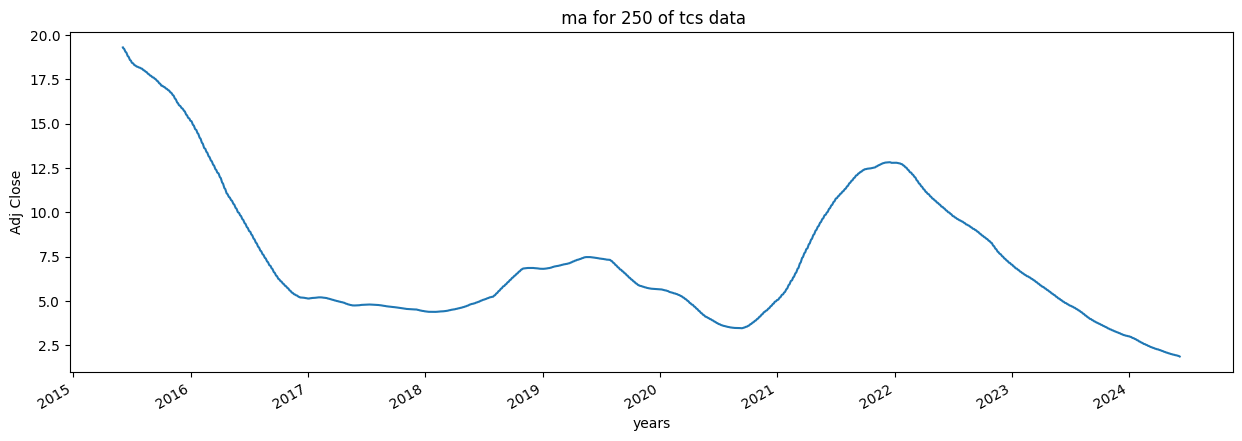

In [23]:
plot_graph((15,5),tcs_data["ma for 250"],'ma for 250')

<Figure size 1500x500 with 0 Axes>

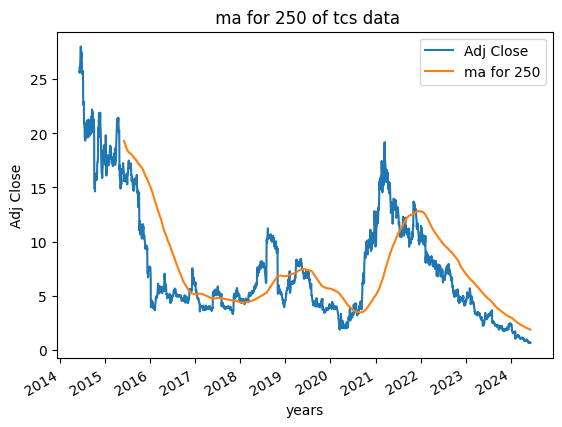

In [24]:
plot_graph((15,5),tcs_data[['Adj Close',"ma for 250"]],'ma for 250')

In [25]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

<Figure size 1500x500 with 0 Axes>

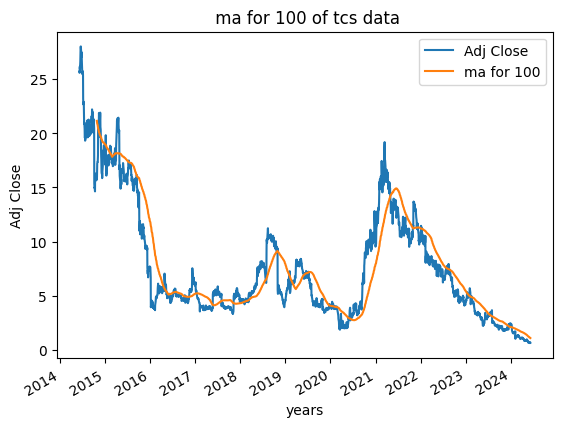

In [36]:
tcs_data["ma for 100"]=tcs_data['Adj Close'].rolling(100).mean()
plot_graph((15,5),tcs_data[['Adj Close',"ma for 100"]],'ma for 100')


<Figure size 1500x500 with 0 Axes>

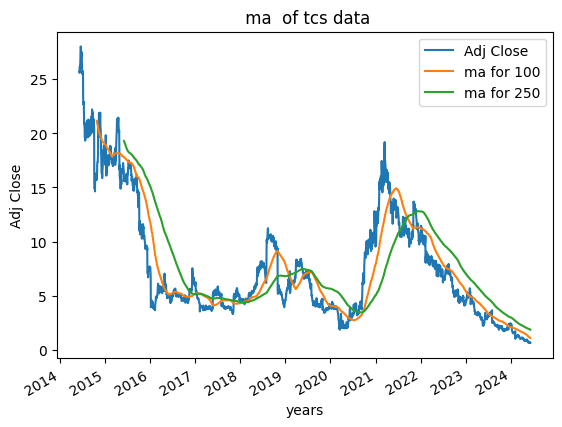

In [37]:
plot_graph((15,5),tcs_data[['Adj Close',"ma for 100","ma for 250"]],'ma ')


In [38]:
Adj_close_price = tcs_data[['Adj Close']]

In [39]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([28.02478218]), array([0.63]))

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.91537585],
       [0.91093993],
       [0.91776446],
       ...,
       [0.00292026],
       [0.00255523],
       [0.00146013]])

In [42]:
len(scaled_data)

2518

In [43]:
x_data = []
y_data = []
for i in range(100,len(scaled_data)):
  x_data.append(scaled_data[i-100:i])
  y_data.append(scaled_data[i])

import numpy as np
x_data,y_data = np.array(x_data), np.array(y_data)

In [44]:
x_data[0],y_data[0]

(array([[0.91537585],
        [0.91093993],
        [0.91776446],
        [0.93209597],
        [0.92322406],
        [0.95018101],
        [0.97816157],
        [0.99010448],
        [0.99931754],
        [1.        ],
        [0.9815738 ],
        [0.96314753],
        [0.9727019 ],
        [0.98055011],
        [0.96655983],
        [0.92493021],
        [0.92083546],
        [0.90684517],
        [0.9071864 ],
        [0.91605831],
        [0.90070311],
        [0.82324464],
        [0.81573773],
        [0.80447721],
        [0.81300789],
        [0.79082816],
        [0.75772915],
        [0.73930295],
        [0.7440801 ],
        [0.72224167],
        [0.69255489],
        [0.69357865],
        [0.69357865],
        [0.68231813],
        [0.6884602 ],
        [0.6973321 ],
        [0.70483909],
        [0.69460234],
        [0.69357865],
        [0.71166362],
        [0.69937948],
        [0.73691441],
        [0.73111357],
        [0.74271525],
        [0.75022223],
        [0

In [45]:
int(len(x_data)*0.7)

1692

In [46]:
2517-int(len(x_data)*0.7)

825

In [47]:

splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[:splitting_len]
y_test = y_data[:splitting_len]



In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(1692, 100, 1)
(1692, 1)
(1692, 100, 1)
(1692, 1)


In [49]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [50]:
model = Sequential()
model.add(LSTM(128,return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [51]:
model.fit(x_train,y_train,batch_size=1, epochs=2)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [55]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [56]:
model.fit(x_train,y_train,batch_size=1, epochs=2)

Epoch 1/2
1692/1692 [==============================] - 178s 103ms/step - loss: 5.6123e-04
Epoch 2/2
1692/1692 [==============================] - 159s 94ms/step - loss: 4.7371e-04


In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
predictions = model.predict(x_test)

53/53 [==============================] - 4s 61ms/step


In [58]:
predictions

array([[0.56897247],
       [0.5547595 ],
       [0.5985752 ],
       ...,
       [0.37662542],
       [0.35984042],
       [0.36080432]], dtype=float32)

In [59]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[16.216877],
       [15.827516],
       [17.027836],
       ...,
       [10.947572],
       [10.48775 ],
       [10.514155]], dtype=float32)

In [60]:
y_test


array([[0.55947659],
       [0.60178867],
       [0.60622466],
       ...,
       [0.3591925 ],
       [0.36028759],
       [0.37671407]])

In [61]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[15.95673943],
       [17.11586952],
       [17.23739243],
       ...,
       [10.47000027],
       [10.5       ],
       [10.94999981]])

In [63]:
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))

In [72]:
start_index = splitting_len + 100

In [73]:
end_index = start_index + len(inv_y_test)

In [75]:
end_index = start_index + len(inv_y_test)

ploting_data = pd.DataFrame(
    {
        'original_test_data': inv_y_test.reshape(-1),
        'Predicted': inv_predictions.reshape(-1)
    },
    index=tcs_data.index[start_index:end_index])

ValueError: Length of values (1692) does not match length of index (726)

In [77]:
ploting_data = pd.DataFrame(
    {
        'original_test_data':inv_y_test.reshape(-1),

        'Predicted':inv_predictions.reshape(-1)
    },
    index = tcs_data.index[splitting_len+250:]
)



ValueError: Length of values (1692) does not match length of index (576)

In [70]:
plot_graph((15,5),ploting_data,'test data')

NameError: name 'ploting_data' is not defined

In [79]:
model.save("Latest_stock")

# New section